## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the Dataset

In [2]:
master = pd.read_csv("cancer_data.csv")

master.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data Exploration

In [3]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
## bare_nuclei, which seems to have int values is shown as object
## checking the unique values in this column to analyse the problem

master.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [5]:
# it has a "?" in between which need to be treated
## checking the count of other values in bare nuclei

master.bare_nuclei.value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [6]:
## "1" as the highest count and since there are only 16 "?" values, which means 2.2% values, we can replace it wiht mode
16/699 *100

2.28898426323319

In [7]:
## storing the mode of bare nuclei in m

m = master.bare_nuclei.mode()[0]
m

'1'

In [8]:
## using lambda function to replace the value of bare nuclei and converrting them to int simultaneously

master.bare_nuclei = master.bare_nuclei.apply(lambda x: int(m) if x == "?" else int(x))

master.bare_nuclei.unique()   ## checking if "?" has been converted

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64)

In [9]:
## Checking Duplicates

master.duplicated().sum() ## 9 duplicated values

9

In [10]:
## Dropping the duplicate values

master.drop_duplicates(inplace = True)

len(master)  ## checking length again to see of duplicated have been dropped

690

## Univariate Analysis

### Boxplots

Feature:  id


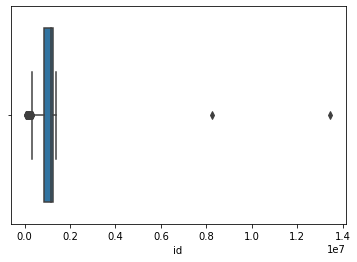

*****************************************************************************************************************************
Feature:  clump_thickness


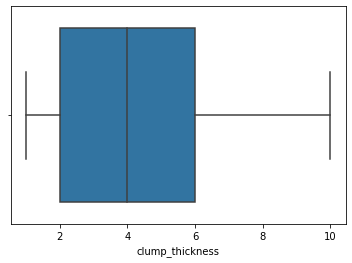

*****************************************************************************************************************************
Feature:  uniform_cell_size


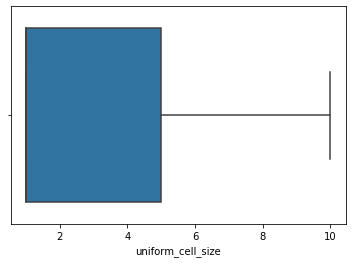

*****************************************************************************************************************************
Feature:  uniform_cell_shape


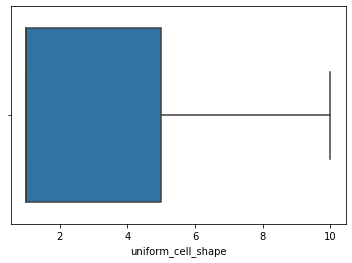

*****************************************************************************************************************************
Feature:  marginal_adhesion


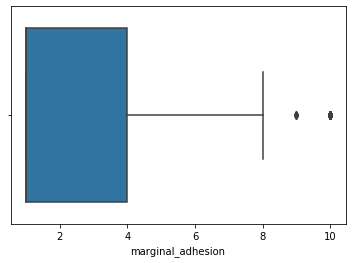

*****************************************************************************************************************************
Feature:  single_epithelial_size


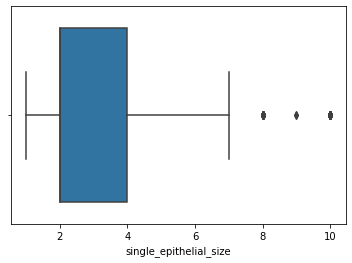

*****************************************************************************************************************************
Feature:  bare_nuclei


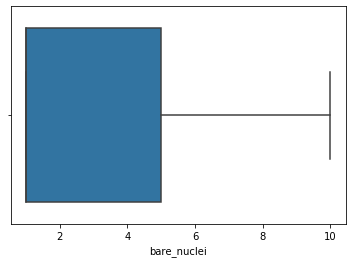

*****************************************************************************************************************************
Feature:  bland_chromatin


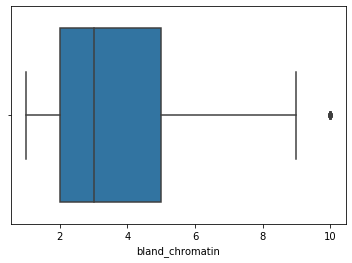

*****************************************************************************************************************************
Feature:  normal_nucleoli


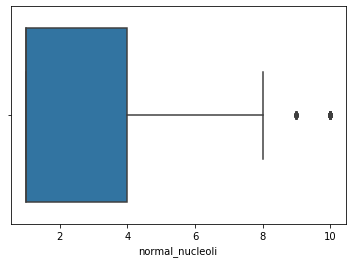

*****************************************************************************************************************************
Feature:  mitoses


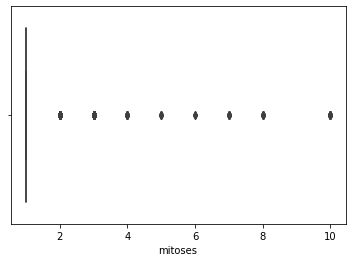

*****************************************************************************************************************************


In [13]:
for col in master.iloc[:, :-1].columns:
    if master[col].dtype != object:
        print("Feature: ", col)
        sns.boxplot(master[col])
        plt.show()
        print("*"*125)

In [17]:
for col in master.iloc[:, 1:].columns:
    print(master[col].value_counts())
    print("*"*125)

1     142
5     129
3     105
4      80
10     69
2      50
8      46
6      33
7      23
9      13
Name: clump_thickness, dtype: int64
*****************************************************************************************************************************
1     378
10     65
3      51
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: uniform_cell_size, dtype: int64
*****************************************************************************************************************************
1     347
2      59
10     56
3      56
4      44
5      33
7      30
6      30
8      28
9       7
Name: uniform_cell_shape, dtype: int64
*****************************************************************************************************************************
1     400
3      58
2      56
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: marginal_adhesion, dtype: int64
***********************************************************************

It doesn't seem a good option to treat the outliers in this data.

Leaving the columns as they are.

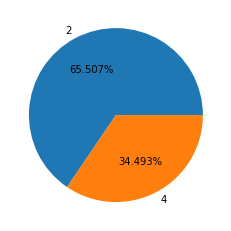

In [35]:
## Checking Data Distribution of the class

plt.pie(df['class'].value_counts(),
       labels = df['class'].unique(),
       autopct = '%0.03f%%');

## Bivariate Analysis

In [50]:
df = master.drop('id', 1)

In [51]:
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Barplots

Relationship between class and  clump_thickness


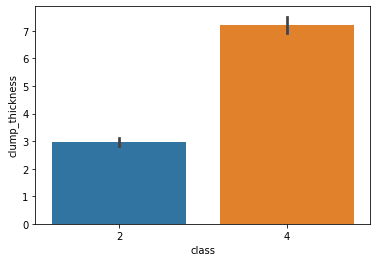

*****************************************************************************************************************************
Relationship between class and  uniform_cell_size


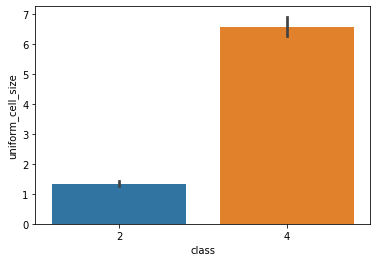

*****************************************************************************************************************************
Relationship between class and  uniform_cell_shape


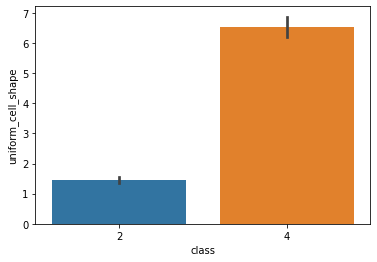

*****************************************************************************************************************************
Relationship between class and  marginal_adhesion


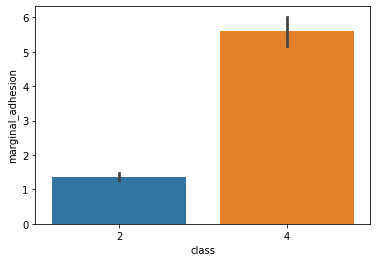

*****************************************************************************************************************************
Relationship between class and  single_epithelial_size


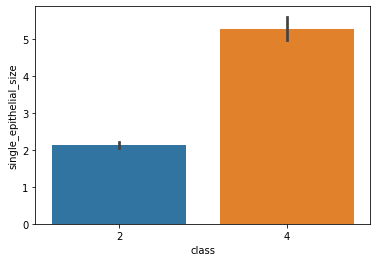

*****************************************************************************************************************************
Relationship between class and  bare_nuclei


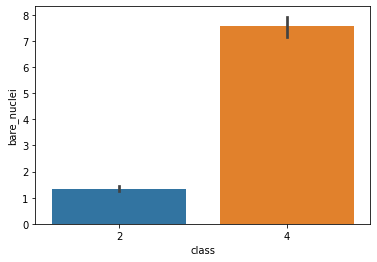

*****************************************************************************************************************************
Relationship between class and  bland_chromatin


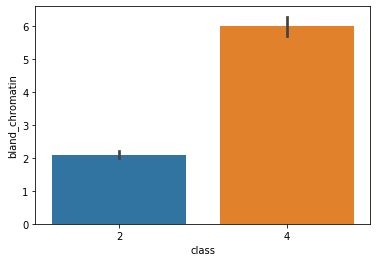

*****************************************************************************************************************************
Relationship between class and  normal_nucleoli


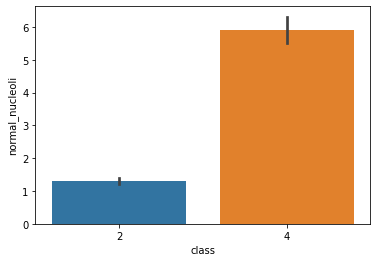

*****************************************************************************************************************************
Relationship between class and  mitoses


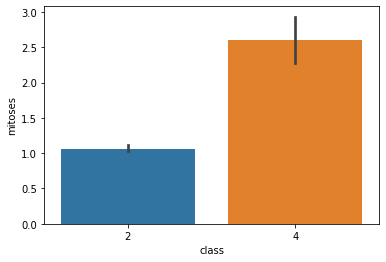

*****************************************************************************************************************************
Relationship between class and  class


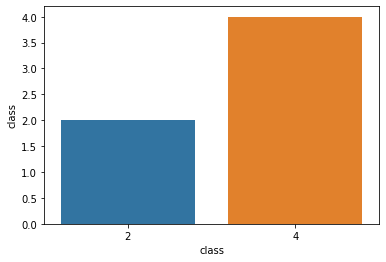

*****************************************************************************************************************************


In [28]:
for col in df.columns:
    print("Relationship between class and ", col)
    sns.barplot(x ='class', y = df[col], data = df)
    plt.show()
    print("*"*125)

### Checking Correlation

In [36]:
df.corr()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
uniform_cell_size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
uniform_cell_shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
marginal_adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
single_epithelial_size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
bare_nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
bland_chromatin,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
normal_nucleoli,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


Mitoses seems to have a very less impact on class as compared to the other variables

## Preprocessing

In [54]:
## Splitting data into target and features

X = df.drop('class', 1)
y = df['class']

display(X.head(),
       y.head())

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [55]:
#converting dataframe to numpy array as MLP works with dataframes

X = X.to_numpy()

y = y.to_numpy()

display(X,y)

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4,

In [56]:
## Splitting the dataset into test and train

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Model Making

In [58]:
from sklearn.neural_network import MLPClassifier

In [59]:
reg = MLPClassifier(hidden_layer_sizes=(2,3),verbose=2,activation="relu" ,batch_size=40,random_state=1, 
                    max_iter=2000, learning_rate_init=0.03)

In [60]:
reg.fit(X_train, y_train)

Iteration 1, loss = 0.97048678
Iteration 2, loss = 0.82792091
Iteration 3, loss = 0.73233675
Iteration 4, loss = 0.60872991
Iteration 5, loss = 0.50791282
Iteration 6, loss = 0.43637868
Iteration 7, loss = 0.36745028
Iteration 8, loss = 0.42217538
Iteration 9, loss = 0.29628210
Iteration 10, loss = 0.26709742
Iteration 11, loss = 0.25247857
Iteration 12, loss = 0.25309063
Iteration 13, loss = 0.23221568
Iteration 14, loss = 0.20250297
Iteration 15, loss = 0.18055240
Iteration 16, loss = 0.18474500
Iteration 17, loss = 0.15277145
Iteration 18, loss = 0.14259954
Iteration 19, loss = 0.13381386
Iteration 20, loss = 0.12423729
Iteration 21, loss = 0.11700714
Iteration 22, loss = 0.11575166
Iteration 23, loss = 0.11685295
Iteration 24, loss = 0.09949566
Iteration 25, loss = 0.10916195
Iteration 26, loss = 0.10794456
Iteration 27, loss = 0.09955246
Iteration 28, loss = 0.08407483
Iteration 29, loss = 0.10436021
Iteration 30, loss = 0.12722928
Iteration 31, loss = 0.10300490
Iteration 32, los

MLPClassifier(batch_size=40, hidden_layer_sizes=(2, 3), learning_rate_init=0.03,
              max_iter=2000, random_state=1, verbose=2)

In [61]:
y_pred=reg.predict(X_test)
y_pred

array([4, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2,
       2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2,
       2, 2, 4, 2, 4, 2, 2, 2, 2], dtype=int64)

In [62]:
y_pred_prob =reg.predict_proba(X_test)
y_pred_prob

array([[3.85861872e-02, 9.61413813e-01],
       [3.85861872e-02, 9.61413813e-01],
       [9.99995935e-01, 4.06537387e-06],
       [9.99982827e-01, 1.71734879e-05],
       [3.85861872e-02, 9.61413813e-01],
       [3.85861872e-02, 9.61413813e-01],
       [9.99975443e-01, 2.45571097e-05],
       [3.85861872e-02, 9.61413813e-01],
       [3.85861872e-02, 9.61413813e-01],
       [9.99998034e-01, 1.96600826e-06],
       [3.85861872e-02, 9.61413813e-01],
       [9.99995113e-01, 4.88651311e-06],
       [9.99998843e-01, 1.15674326e-06],
       [3.85861872e-02, 9.61413813e-01],
       [9.99992336e-01, 7.66390037e-06],
       [3.85861872e-02, 9.61413813e-01],
       [3.85861872e-02, 9.61413813e-01],
       [3.63444408e-01, 6.36555592e-01],
       [9.96902448e-01, 3.09755212e-03],
       [3.85861872e-02, 9.61413813e-01],
       [9.99975969e-01, 2.40311204e-05],
       [3.85861872e-02, 9.61413813e-01],
       [3.85861872e-02, 9.61413813e-01],
       [9.99979044e-01, 2.09562231e-05],
       [9.999993

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9371980676328503

### The model has given 93% accuracy on test data

In [64]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([4, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2,

In [65]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred_train, y_train)

0.979296066252588

### It has given 97% accuracy on train data. So, there is neither underfit nor overfit.